# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3 + x^4$

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should $start$ by filling an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Based on where the roots are, and how many there are, you may want to adjust these lower and upper limits.

Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (npts_per_slice), for npts_per_slice values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.  HINT:  Compare the patterns that you see for limits of (-4.0,4.0), (0.0,1.5), and (0.0,1.0), using 10000 data points for each.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [43]:
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x+par[4]*x*x*x*x

xl = -4.0
xh = 4.0

npoints = 10000
dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.80,-4.00,0.40,1,1])
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [44]:
start = time.time()

# Define the number of data points in each of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = (int)(npoints/nsearch)

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
xcomp = xval[0]
nroots_found = 0

# loop over the slices
for i in range(1,int(niter)+1):
    # Begin at the right most data point in the slice 
    #print (i)
    y = yval[nsearch*i-1]
    x = xval[nsearch*i-1]
    print(i,xcomp,x,ycomp,y)

    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % x)
        xroots.append(x)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply bisection method
        #
        # First, get the x-values of the left and right ends of the slice

        #print (y,ycomp)

        xlow = xcomp
        xhigh = x
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.0E-6

        diff = 1.0E12
        n_eps_iter = 0
        while (diff>epsilon and n_eps_iter < 1000):
            #print ("in epsilon loop")
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            #print (fa,fb,fc)
            #print (xlow,xhigh,xmid)

            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)
            n_eps_iter = n_eps_iter + 1

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1

        # move to the next slice
        ycomp = y
        xcomp = x
    else:
        # move to the next slice
        ycomp = y
        xcomp = x

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print("Total time = ",(end - start))
time_ejb = (end-start)

1 -4.0 -3.200800000000088 216.2 90.87116303965142
2 -3.200800000000088 -2.400800000000176 90.87116303965142 33.09276657081136
3 -2.400800000000176 -1.6008000000002642 33.09276657081136 11.692794217168911
4 -1.6008000000002642 -0.8008000000003523 11.692794217168911 5.157415578728489
5 -0.8008000000003523 -0.0008000000004404484 5.157415578728489 1.8032002554901718
6 -0.0008000000004404484 0.7991999999994714 1.8032002554901718 -0.22288215255030602
Found root at x = 0.539581

7 0.7991999999994714 1.5991999999993833 -0.22288215255030602 7.056537954598467
Found root at x = 0.938239

8 1.5991999999993833 2.3991999999992952 7.056537954598467 41.44923017692357
9 2.3991999999992952 3.199199999999207 41.44923017692357 130.59336411440776
10 3.199199999999207 3.999199999999119 130.59336411440776 311.95750936702945
Total number of roots found = 2

Total time =  0.0010607242584228516


Found root at x = 0.539581

Found root at x = 0.938239

Total number of roots found = 2



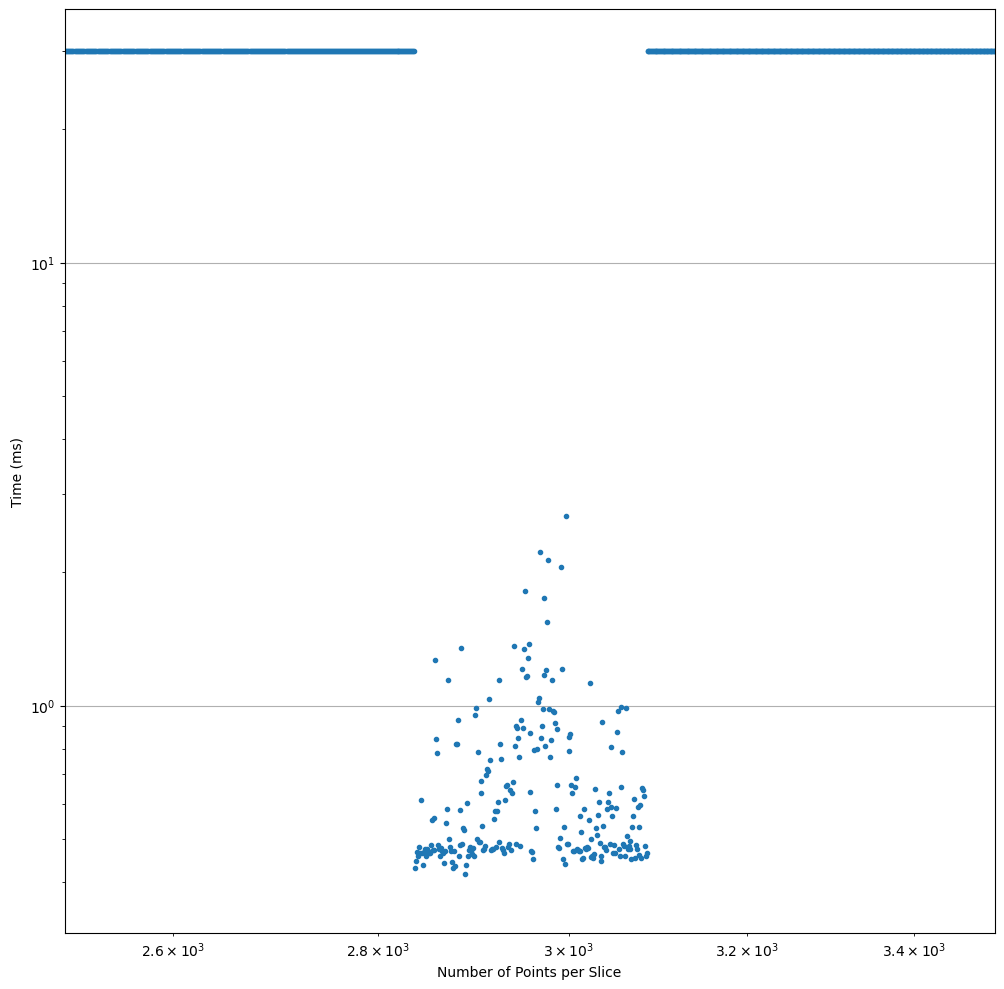

In [47]:
# Part b

xroots = []
yroots = []

# create list to hold values for plotting
#
# xstep will hold the number of slices
# xstep2 will hold the number of data points per slice

xstep = []
ystep = []
xstep2 = []

nroots_expected = 2

# Loop over various possibilities for the number of data points per slice (npts_per_slice)
for npts_per_slice in range(1,int(npoints)):
    
    start = time.time()

    # Calculate number of slices
    nslice = npoints/npts_per_slice
    
    ycomp = yval[0]
    xcomp = xval[0]
    nroots_found = 0

    # Loop over the slices, looking for possible roots in each slice
    for i in range(1,int(nslice)+1):
        y = yval[npts_per_slice*i-1]
        x = xval[npts_per_slice*i-1]
        
        if (y==0):
            if (npts_per_slice == 1):
                print ("Found exact root at x = %f\n" % x)
            nroots_found = nroots_found + 1
            
        if (y*ycomp<0.0):
            xlow = xcomp
            xhigh = x
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (npts_per_slice == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
            xcomp = x
        else:
            ycomp = y
            xcomp = x

    if (npts_per_slice == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nslice)
    xstep2.append(npts_per_slice)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

plt.yscale('log')
plt.xscale('log')
axs.plot(xstep2,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Points per Slice')
axs.axhline()
plt.grid(True)
axs.set_xlim(2500,3500)
plt.show()

### Part c)

There are a few patterns here to highlight.

1. The failure to find roots at high number of points per slice.
2. The overall decrease in time taken as the number of points per slice increases.
3. The intermittent failures and successes at finding roots

Pattern 1 is caused by the number of slices ($n_{slices}=\frac{N_{array}}{n_{per slice}}$) being too small as the points per slice reaches the size of the original array (or the number of slices approaches 1).

Pattern 2 stems from lower x-values corresponding to many slices, which is more computationally intensive but more effective at finding roots.

Pattern 3 is likely due to the number of slices being indivisible, as the condition for a root being found is that the number of points per slice eventually reaches 1.

## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Non-Linear Fitting to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [5]:
# Use file in JupyterNotebooks
# Split exponentials
# Guess initial parameters based on data
# Try plotting results on log scale
# Account for error bars in fitting
# Assign half of smallest digit uncertainty for each point

In [6]:
import pandas as pd
import scipy.stats as stats
from scipy.optimize import curve_fit

In [7]:
f = pd.read_csv("../JupyterNotebooks/standard_atmosphere.txt")
print(f)

    Altitude  Temperature  Gravity   Pressure   Density  Viscosity
0      -1000        21.50    9.810  11.390000  1.347000      1.821
1          0        15.00    9.807  10.130000  1.225000      1.789
2       1000         8.50    9.804   8.988000  1.112000      1.758
3       2000         2.00    9.801   7.950000  1.007000      1.726
4       3000        -4.49    9.797   7.012000  0.909300      1.694
5       4000       -10.98    9.794   6.166000  0.819400      1.661
6       5000       -17.47    9.791   5.405000  0.736400      1.628
7       6000       -23.96    9.788   4.722000  0.660100      1.595
8       7000       -30.45    9.785   4.111000  0.590000      1.561
9       8000       -36.94    9.782   3.565000  0.525800      1.527
10      9000       -43.42    9.779   3.080000  0.467100      1.493
11     10000       -49.90    9.776   2.650000  0.413500      1.458
12     15000       -56.50    9.761   1.211000  0.194800      1.422
13     20000       -56.50    9.745   0.552900  0.088910      1

Text(0.5, 1.0, 'Standard Atmosphere Data')

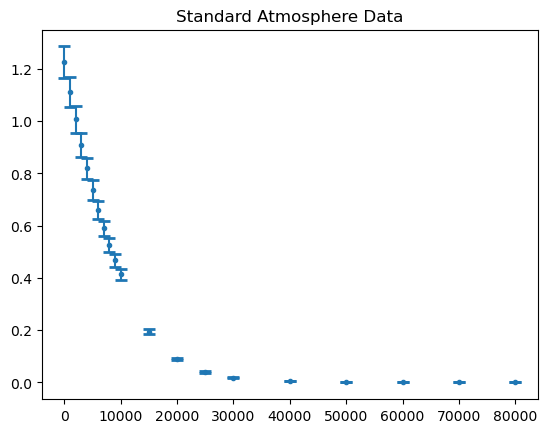

In [8]:
xlow = 0
xhigh = 80000
alt = []
dens = []
derror = []
for i in range(len(f['Altitude'])):
    if f["Altitude"][i] >= 0:
        alt.append(f["Altitude"][i])
        dens.append(f["Density"][i])
        derror.append(f["Density"][i]*0.05)

figure, axis = plt.subplots(1, 2)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.errorbar(alt,dens,yerr=derror, fmt='.', capsize=4, capthick=2)
plot1.set_title("Standard Atmosphere Data")

In [9]:
def fit_function(x,*par):
    return par[0]*(np.exp(par[1]*x)*np.exp(np.sqrt(x)*par[2]))

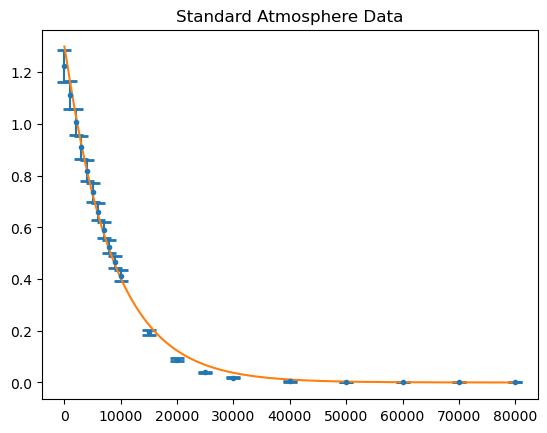

In [10]:
init_vals = [1.3,-0.00012,0.0003]

# Plot to see how it looks
x=np.linspace(0,80000,5000)
y=fit_function(x,init_vals[0],init_vals[1],init_vals[2])

figure, axis = plt.subplots(1, 2)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

# Plot the data in the upper left panel, and give this panel a title
plot1.errorbar(alt,dens,yerr=derror, fmt='.', capsize=5, capthick=2)
plot1.set_title("Standard Atmosphere Data")
plot1.plot(x,y)

In [11]:
# Fit!

popt, pcov = curve_fit(fit_function,alt,dens,p0=init_vals, sigma=derror, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print ("Covariance Matrix:")
print(pcov)
print()
print ("Best Fit Parameters:")
print(popt)
print()
print ("Errors in Fit Parameters:")
print(perr)

Covariance Matrix:
[[ 1.89789513e-03  6.26030237e-08 -2.08720015e-05]
 [ 6.26030237e-08  3.57911155e-12 -9.99874639e-10]
 [-2.08720015e-05 -9.99874639e-10  2.99314311e-07]]

Best Fit Parameters:
[ 1.34823638e+00 -1.45359807e-04  1.09102181e-03]

Errors in Fit Parameters:
[4.35648382e-02 1.89185400e-06 5.47096254e-04]


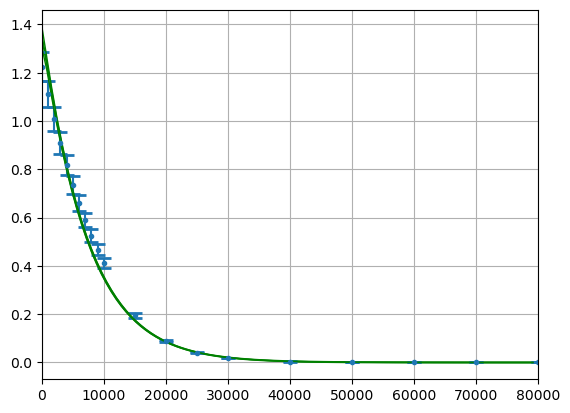

In [34]:
nfitpoints = 100
dx = (xhigh-xlow)/nfitpoints

xfitting = []
yfitting = []
for i in range(0,nfitpoints):
    xfitting.append(xlow+dx*i)
    yfitting.append(fit_function(xfitting[i],*popt))
xfitting = np.array(xfitting)
yfitting = np.array(yfitting)
    
figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot1.plot(xfitting,yfitting,'g-')
plot1.errorbar(alt,dens,yerr=derror, fmt='.', capsize=5, capthick=2)

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fit_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

plot1.plot(xfitting,lower,'g-',linewidth=1)
plot1.plot(xfitting,upper,'g-',linewidth=1)

plot1.grid()
plt.xlim(0,80000)
plt.show()

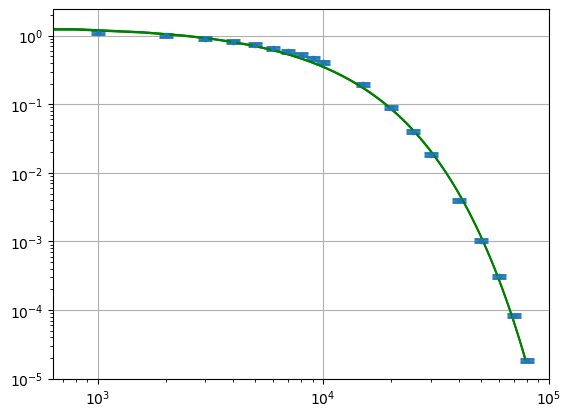

In [26]:
# Plot on log scale!
figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot1.plot(xfitting,yfitting,'g-')
plot1.errorbar(alt,dens,yerr=derror, fmt='.', capsize=5, capthick=2)

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fit_function(xfitting,*pi) for pi in ps])

lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)
middle = (lower+upper)/2.0

plot1.plot(xfitting,lower,'g-',linewidth=1)
plot1.plot(xfitting,upper,'g-',linewidth=1)

plot1.grid()
plt.xscale('log')
plt.yscale('log')

This doesn't look awful, but it's not great either... it misses a good number of the data points!

The issues stem from the initial values and the error bars extracted from the initial data. It seems to fit well around x=20000, but doesn't agree within error anywhere else. If you wanted accurate results, you would likely want to split up the altitude into segments and fitting that smaller chunk of data (which may require more measurements).

It's also worth noting that I cut the -1000 altitude to avoid dealing with the resulting imaginary number.